<div class="alert alert-block alert-info">

# <u>Table of Contents<u>
    
>1. [Importing Libraries](#Libraries)
2. [Importing and Assessing Data](#data)
3. [Data Preparation](#data_prep)
4. [Data Visualization](#data_visualization)
5. [Label Encoding](#label)
6. [Removing Outliers (z-score)](#zscore)
7. [Splitting into X & Y](#xy)
8. [Standardizing and Transforming the data](#standard)
9.   [Train Test Split](#split)
10. [Model Building](#Model) 
11. [Saving File](#save)

***
<div class='alert alert-box alert-info'>
    <b>I. Importing Libraries <b>
        <a id='Libraries'></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***
<div class='alert alert-box alert-info'>
    <b>II. Importing and Assessing the Dataset <b>
        <a id='data'></a>

In [2]:
df = pd.read_csv("census_income.csv")
df 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# looking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# looking at the value_counts of the unique values in all the columns
for i in df:
    print ('-'*50,'\n',df[i].value_counts(),'\n')

-------------------------------------------------- 
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 

-------------------------------------------------- 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

-------------------------------------------------- 
 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64 

-------------------------------------------------- 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th            

- We can assume that the "?" value are Null values.
- The null values are present in Workclass, Occupation, Native_country

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


***
<div class='alert alert-box alert-info'>
    <b>III. Data Preparation<b>
    <a id='data_prep'></a>

In [8]:
# few values have spaces before and after the string, so, using .strip() to clean that.
for i in df:
    if df[i].dtypes=='O':
        df[i] = df[i].str.strip()

In [9]:
# checking how much data would be left if the "?" were removed  
# Native_country(583) + Occupation(1843) + Workclass(1836) = 4262
print ("Shape of data before removal:",df.shape[0],'\nShape of data after removal:',df.shape[0]-4262,
       "\nPercentage of data loss:",(df.shape[0]-(df.shape[0]-4262))/df.shape[0]*100,'%')

Shape of data before removal: 32560 
Shape of data after removal: 28298 
Percentage of data loss: 13.089680589680588 %


In [10]:
# proceeding with the removal of "?" from the dataset
df = df[df.Native_country!='?']
df = df [df.Occupation!='?']
df = df [df.Workclass!='?']

In [11]:
# cleaning the values of the columns
df['Workclass'] = df['Workclass'].replace({'Local-gov':'Govt-employed', 'State-gov':'Govt-employed', 'Self-emp-not-inc':'Self-employed',
                         'Self-emp-inc':'Self-employed','Federal-gov':'Govt-employed'})
df['Marital_status'] = df['Marital_status'].replace({'Married-spouse-absent':'Separated','Married-civ-spouse':'Married',
                                                     'Married-AF-spouse':'Married'})

In [12]:
# deleting "without-pay" from the column because it is impossible for it to affect the target variable as those who are 
# unemployed do not earn money.
df = df [df.Workclass!='Without-pay']

***
<div class='alert alert-box alert-info'>
    <b>IV. Data Visualization<b>
        <a id='data_visualization'></a>

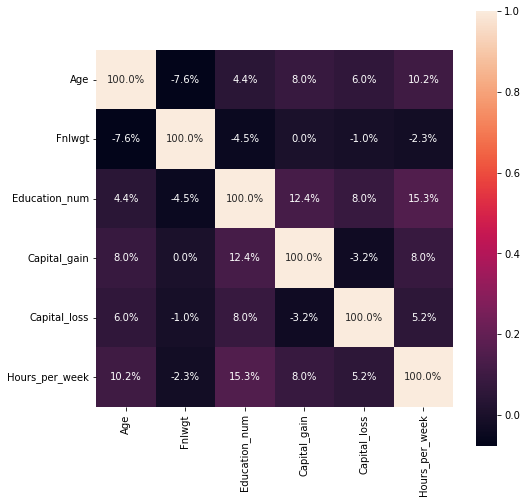

In [13]:
# plotting correlation heat map
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),fmt='.1%',annot=True,square=True)
plt.show()

- The correlation percentages are pretty low for the plotted columns with the highest being __15.3%__ for `Education_num` and `Hours_per_week` 
- Will plot the heatmap again, once the dataset values are encoded

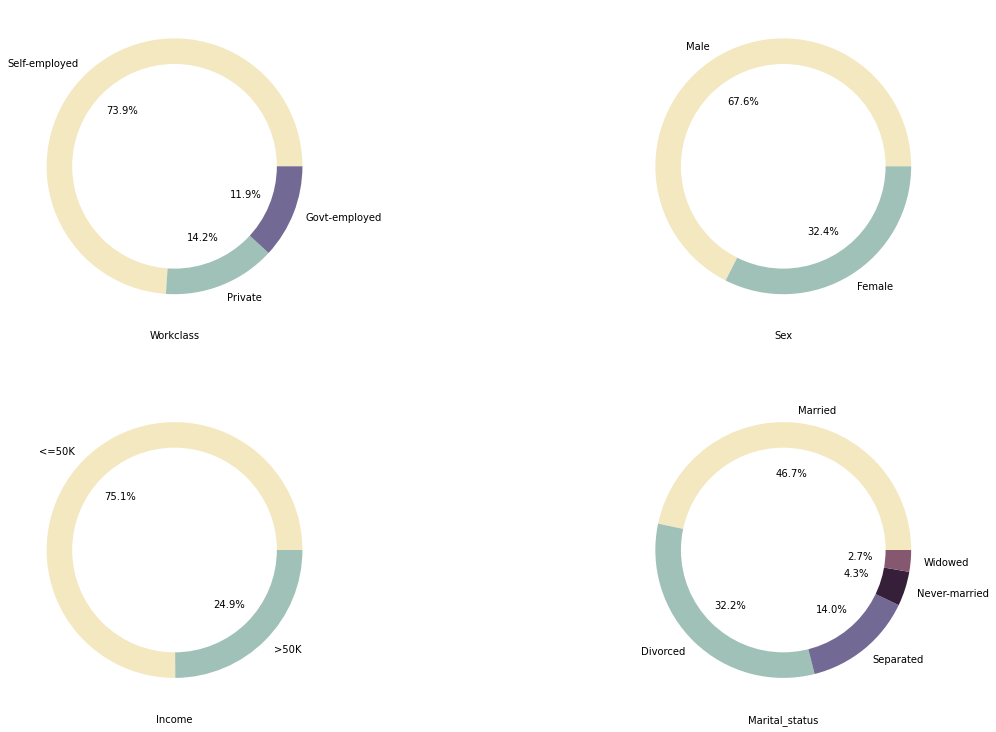

In [14]:
# plotting pie charts of workclass, Sex, Income, Marital_status
collist = ['Workclass', 'Sex', 'Income', 'Marital_status']
nrows = 3
ncols = 2

plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    plt.pie(df[collist[i]].value_counts(),autopct='%1.1f%%',labels=df[collist[i]].unique(),colors=[('#F4E8C1'),('#A0C1B8'),
                                                                                                   ('#726A95'),('#351F39'),
                                                                                                   ('#85586F'),
                                                                                                   ])
    centre = plt.Circle((0,0), 0.8, fc='w')
    plt.gca().add_artist(centre)
    plt.xlabel(collist[i])

__Observation:__
1. <u>Workclass</u>: Majority of the population sample is `Self-employed (73.9%)`, `Private (14.2%)`, `Govt. employed (11.9%)` 
2. <u>Sex</u>: Majority of the population sample is comprised of `Males (67.6%)` and then Females `(32.4%)`
3. <u>Income</u>: Majority of the population sample earn `<=50K (75.1%)` and `>50K (24.8%)`
4. <u>Marital_Status</u>: Majority of the population sample are `Married (46.7%)`, `Divorced (32.2%)`, `Separated (14%)`, `Never-married (4.3%)`, `Widowed (2.7%)`

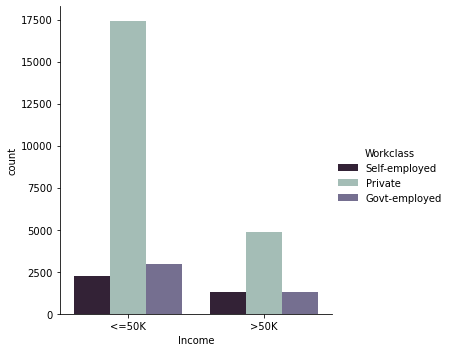

In [15]:
# plot to see workclass vs income
sns.catplot(x='Income',hue='Workclass',kind='count',data=df, palette=['#351F39','#A0C1B8','#726A95'])
plt.show()

__Observation Ranking:__

- `<=50K`
    1. Private sector: People working in private sectors are earning <=50K the most
    2. Government Employed
    3. Self-Employed
    
    
- `>50K` 
    1. Private 
    2. It's a tie between self-employed and government employed

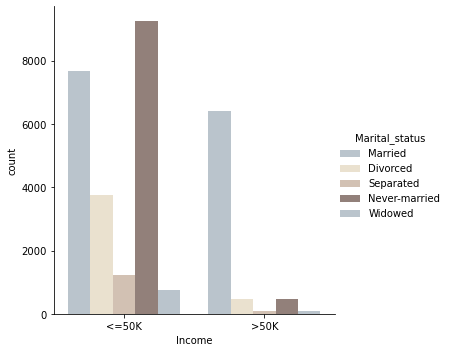

In [16]:
# plotting marital status vs income
sns.catplot(x='Income', hue='Marital_status', data=df, kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation:__
- Most people who are earning more than 50k ___never married___
- People earning earning less than 50K ___are married___

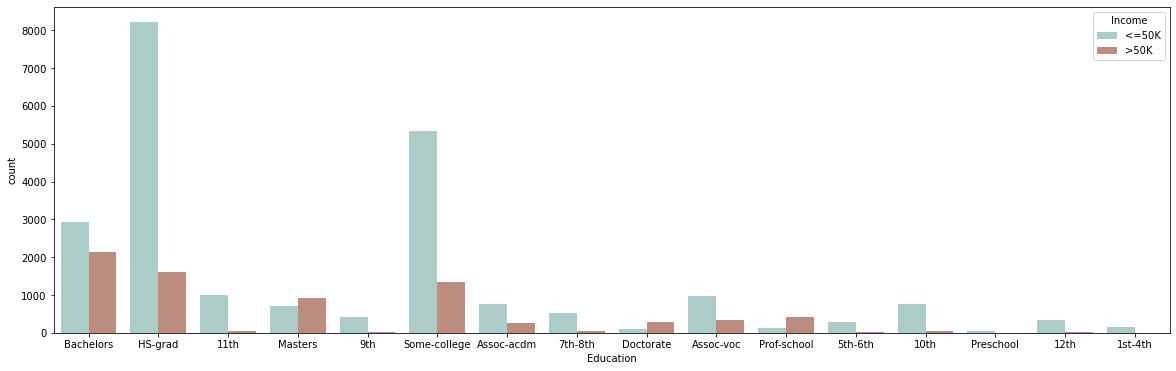

In [17]:
# plotting Education vs Income
plt.figure(figsize=(20,6))
sns.countplot(x='Education', data=df, hue='Income',palette=['#A7D2CB','#C98474'])
plt.show()

___Observation:___
1. The highest earners are those with ___high school diplomas___, followed by those with ___college degrees___, and then those with ___bachelor's degrees___.
2. People with ___bachelor's degrees___ make up the majority of those making less than 50K, followed by ___high school grads___ and some ___college grads___.

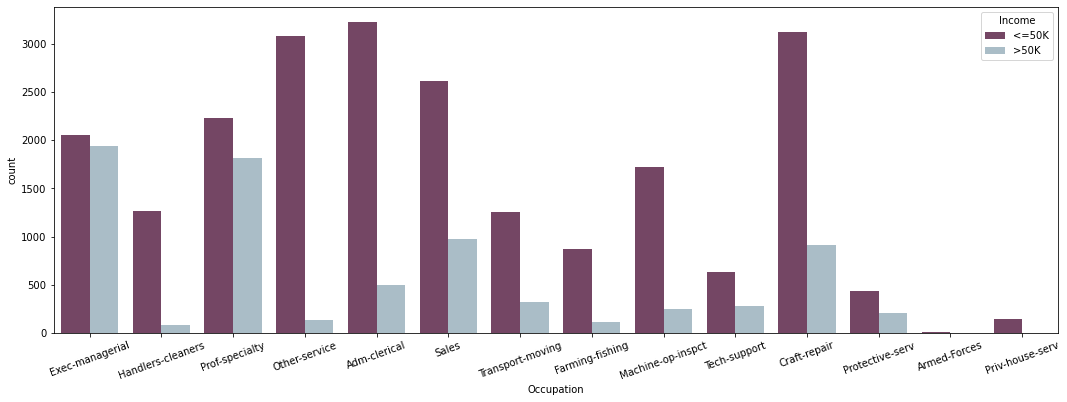

In [18]:
# plotting histogram of occupation to get an idea of 
plt.figure(figsize=(18,6))
sns.countplot(x='Occupation', data=df, hue='Income',palette=['#7C3E66','#A5BECC'])
plt.xticks(rotation=20)
plt.show()

__Observation:__
- ___Administration/clerical roles___, ___Craft-repair___, ___other-service___ and ___Sales___ are the top occupations with the majority of them earning <=50K.
- ___Exec-managerial___, ___Prof-specialty___, ___Sales___ and ___craft-repair___ have the most people earning >50K.

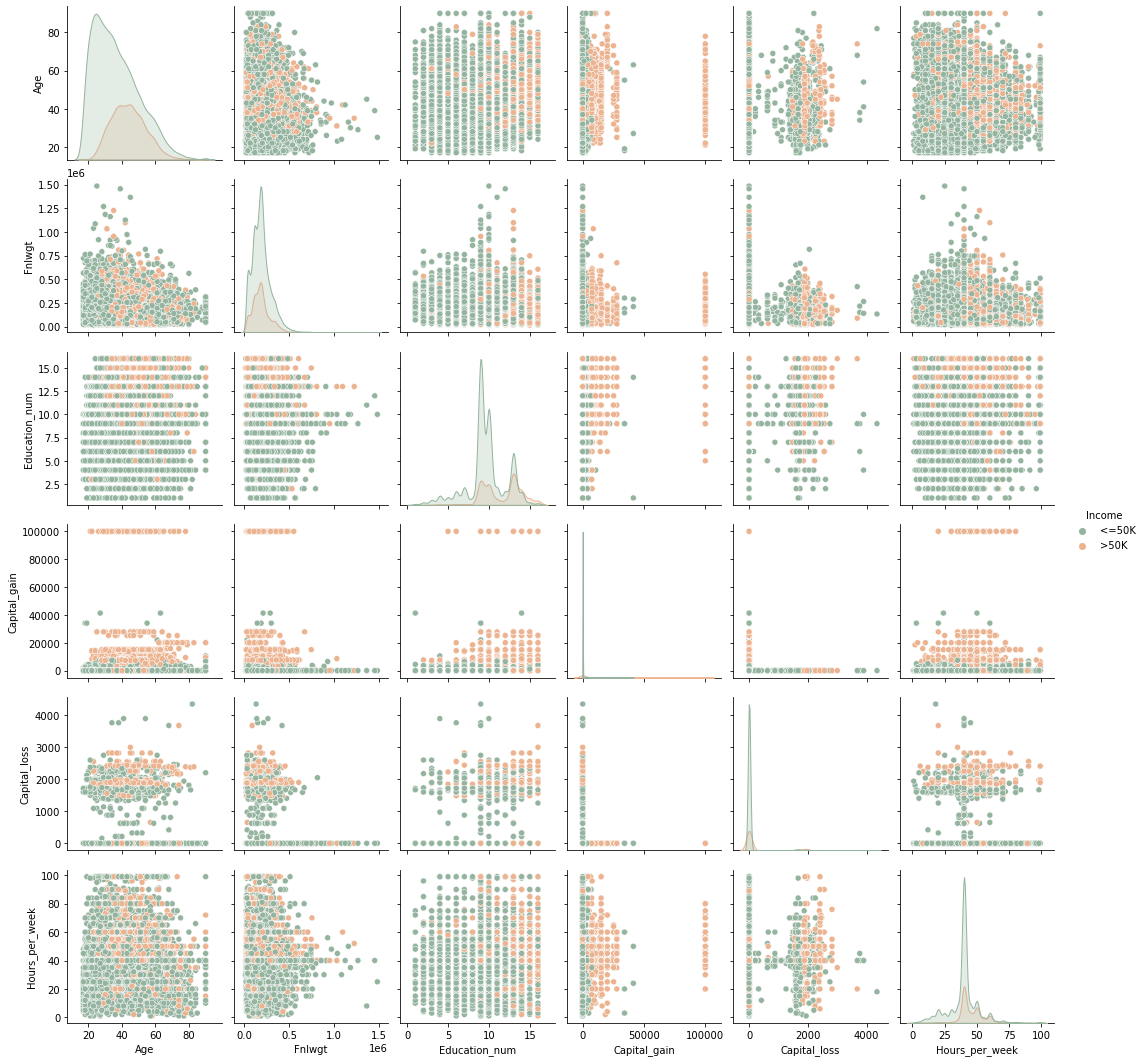

In [19]:
sns.pairplot(df, hue='Income',palette=['#94B49F','#ECB390'])

__Observation:__
1. __Age:__ 
    1. _<=50K_: majority of the population earning <=50K are in the range of 20-30 years.
    2. _>50K_: majority of the people earning less than 50K are in the range of 27-35 years.
    
2. __Hours_per_week:__ majority of the population work _30-40 hours per week_

***
<div class='alert alert-box alert-info'>
    <b>V. Label Encoding<b>
        <a id='label'></a>

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    if df[i].dtypes=='O':
        df[i] = le.fit_transform(df[i]).astype('int32')

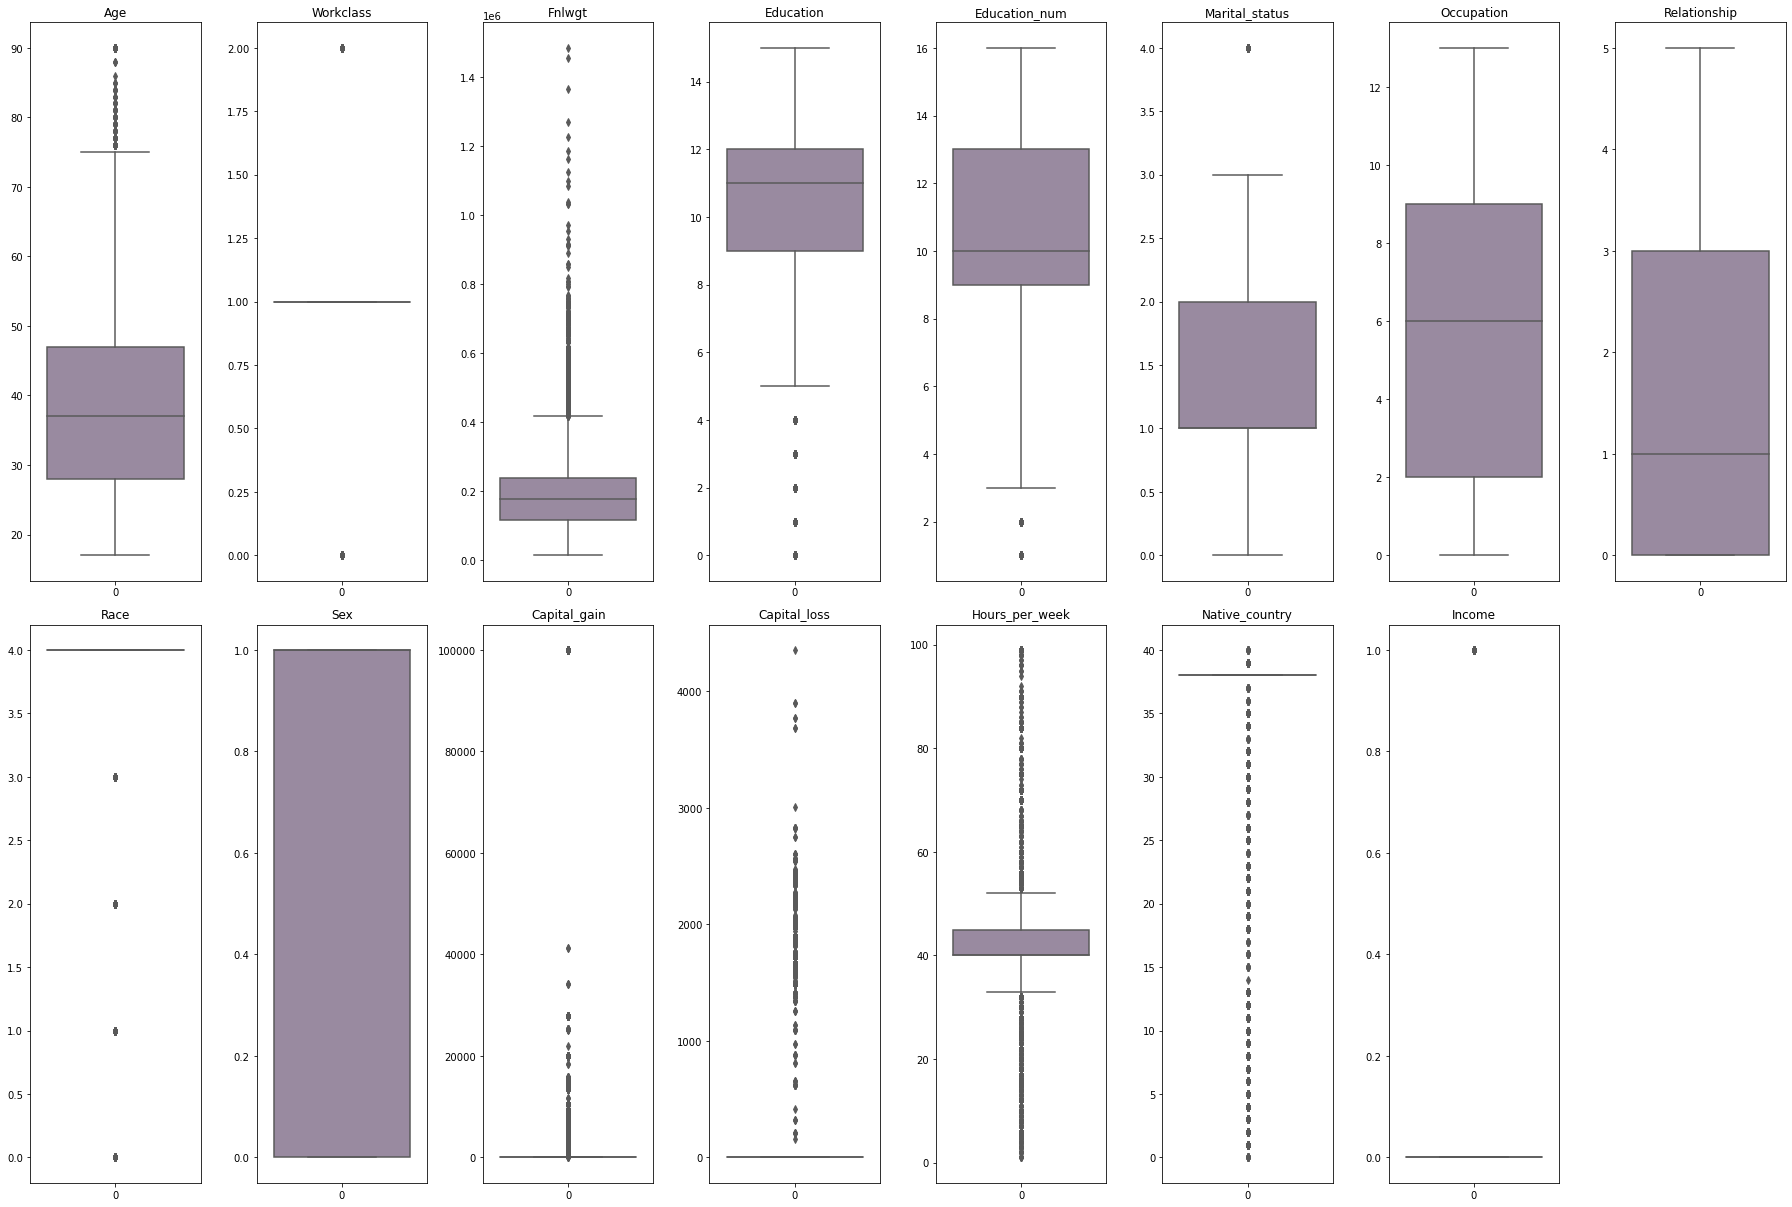

In [21]:
# checking for outliers
collist = df.columns.values
nrows = 3
ncols = 8

plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df[collist[i]],orient='v',palette=['#9A86A4'])
    plt.title(collist[i])
    plt.tight_layout()

- Numerous outliers can be observed.

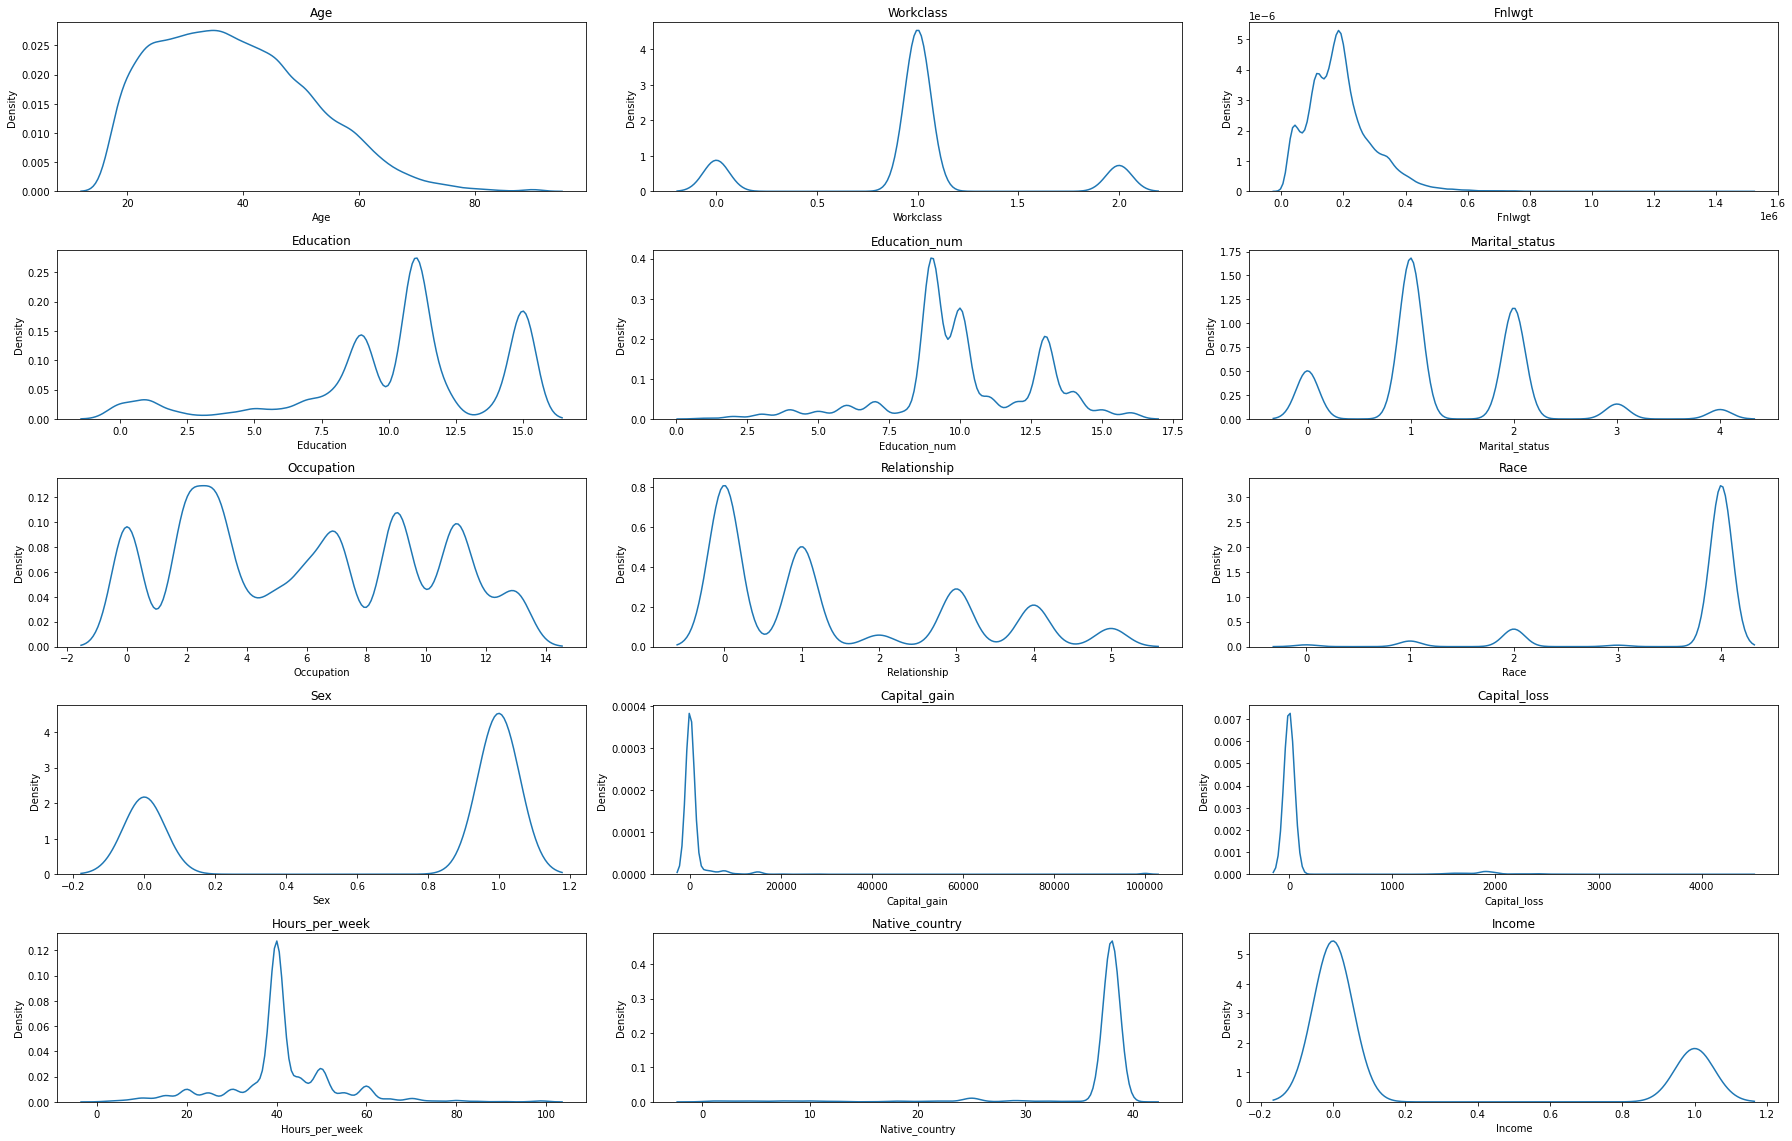

In [22]:
# checking skewness
collist = df.columns.values
nrows = 8
ncols = 3

plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.kdeplot(x=df[collist[i]],palette='#EC994B')
    plt.title(collist[i])
    plt.tight_layout()

- Data is skewed as well

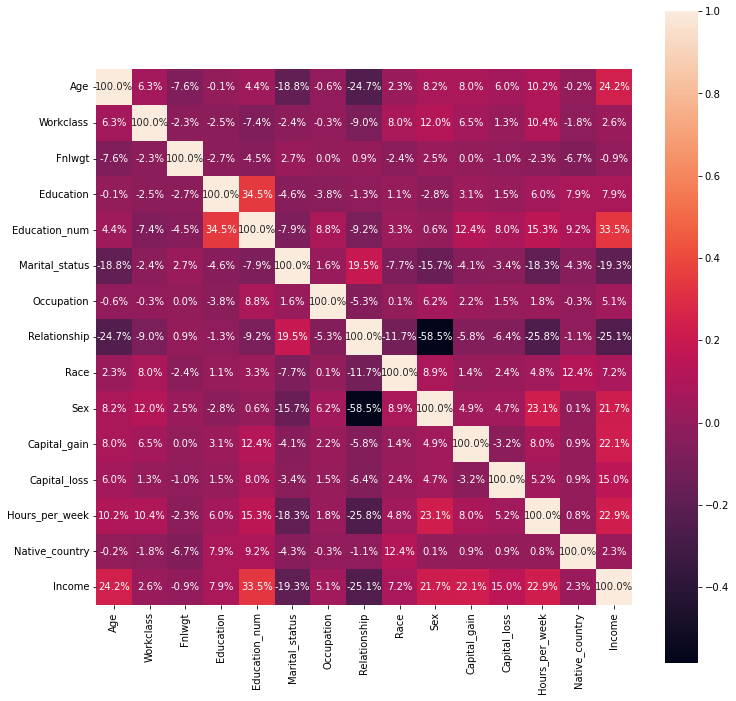

In [23]:
# plotting correlation heat map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),fmt='.1%',annot=True,square=True)
plt.show()

***
<div class='alert alert-box alert-info'>
    <b>VI. Removing Outliers (z-score)<b>
        <a id='zscore'></a>

In [24]:
from scipy.stats import zscore

z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 16.920423259362458 %


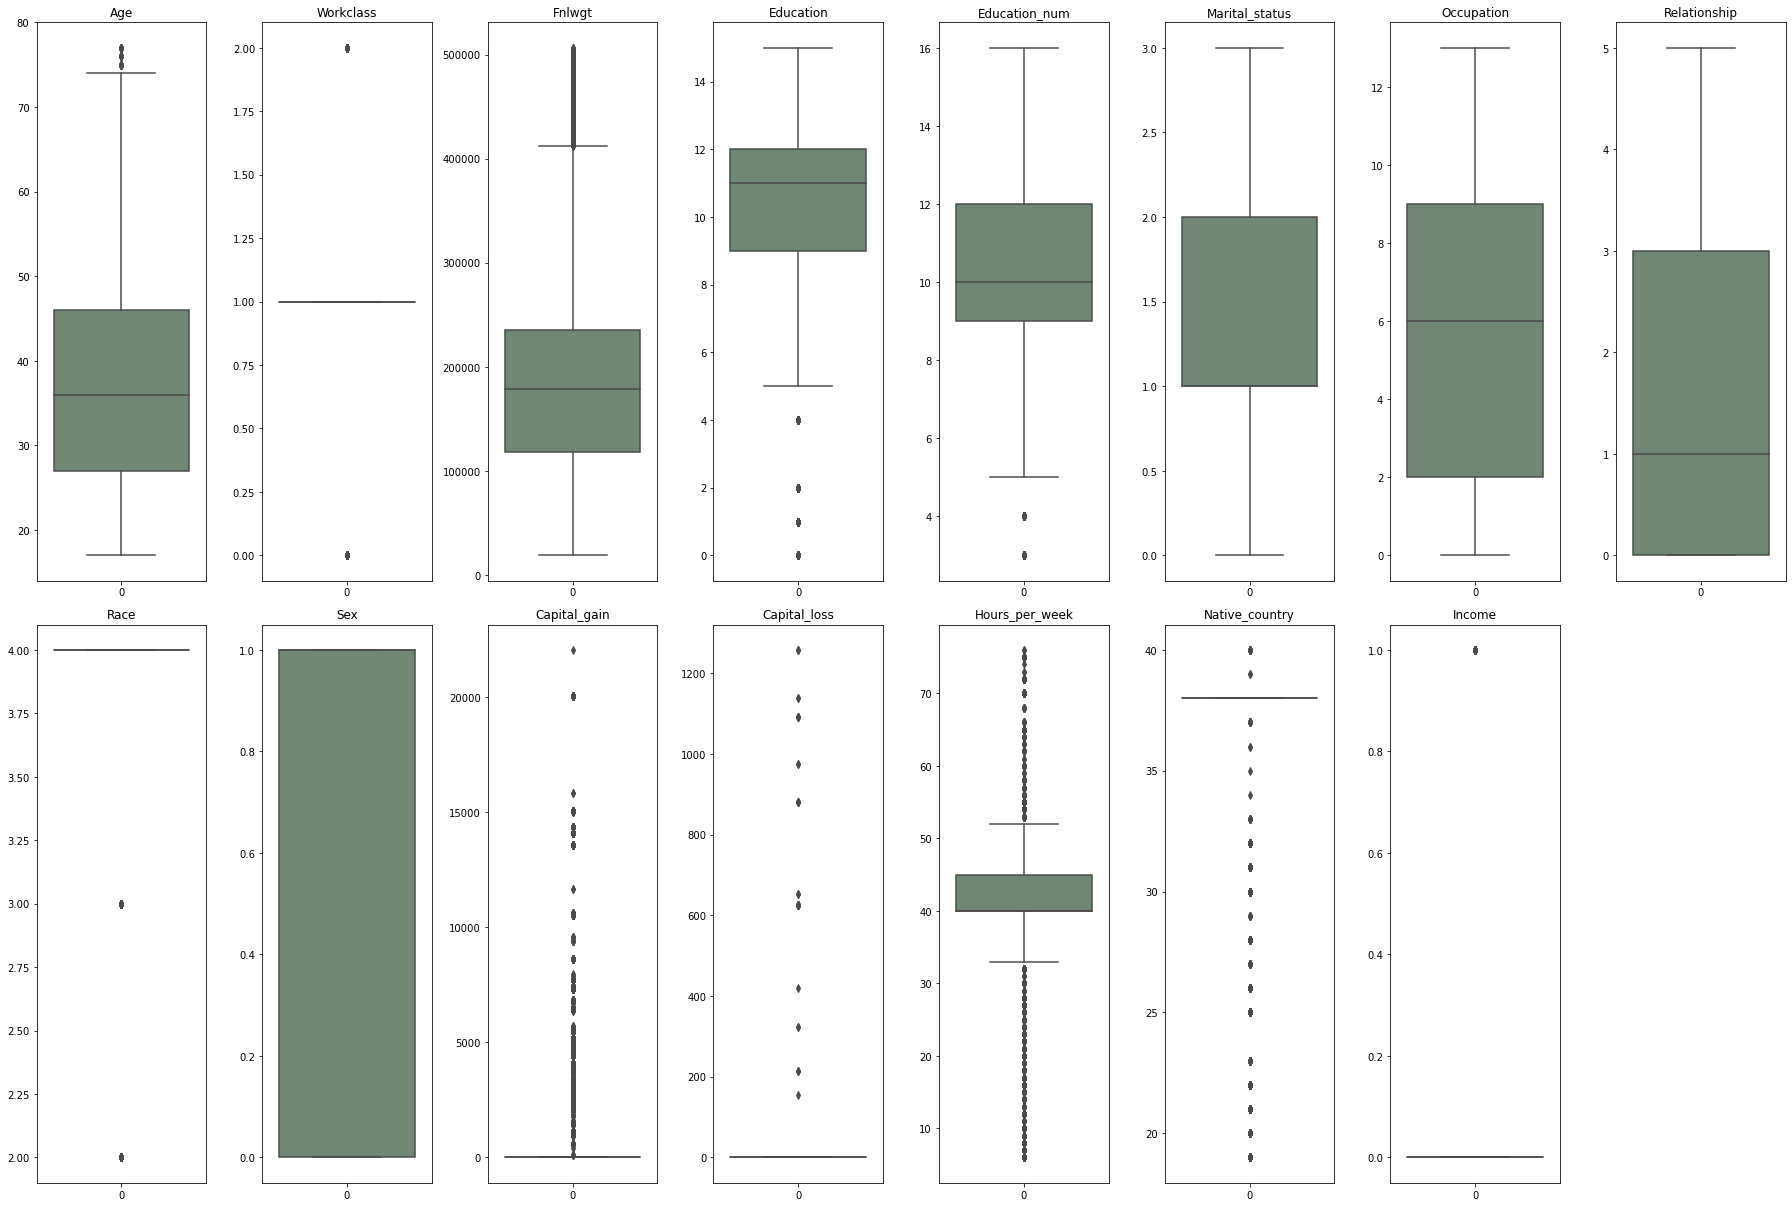

In [25]:
# checking for outliers after zscore
collist = df_new.columns.values
nrows = 3
ncols = 8

plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df_new[collist[i]],orient='v',palette=['#6D8B74'])
    plt.title(collist[i])
    plt.tight_layout()

***
<div class='alert alert-box alert-info'>
    <b>VII. Splitting into X & Y and SMOTE Over Sampling<b>
        <a id='xy'></a>

In [26]:
x = df_new.drop('Income',axis=1)
y = df_new['Income']

In [27]:
# using SMOTE to over sample the data, since there is a pretty high difference in the number of values for <=50K(24719) 
# and >50K(7841)
from imblearn.over_sampling import SMOTE
x,y = SMOTE().fit_sample(x,y)

***
<div class='alert alert-box alert-info'>
    <b>VIII. Standardizing and Transforming the data<b>
        <a id='standard'></a>

In [28]:
from sklearn.preprocessing import StandardScaler, power_transform

x = StandardScaler().fit_transform(x)
x = power_transform(x,method='yeo-johnson')

In [29]:
# checking skewness after standardizing and transforming
pd.DataFrame(x).skew()

0      0.032379
1      0.234920
2      0.018040
3     -0.036736
4     -0.113007
5     -0.090178
6      0.025766
7      0.489205
8     -2.643063
9     -0.889524
10     2.226782
11    30.131868
12    -0.026857
13     9.749342
dtype: float64

- Keeping the threshold at +/-0.5
    - Race, Capital_gain, Capital_loss, Hours_per_week and Native country have high skewness  

***
<div class='alert alert-box alert-info'>
    <b>IX. Train Test Split<b>
        <a id='split'></a>

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=8)

<div class='alert alert-box alert-info'>
    <b>X. Model Building<b>
        <a id='Model'></a>

In [31]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [32]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,model.predict(x_test))
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':[1,10]}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'l2'}

Model: LogisticRegression
Accuracy Score: 78.27
f1 Score: 78.27
CV Score: 0.7822056175667688
ROC_AUC Score: 78.25
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      4730
           1       0.77      0.81      0.79      4834

    accuracy                           0.78      9564
   macro avg       0.78      0.78      0.78      9564
weighted avg       0.78      0.78      0.78      9564



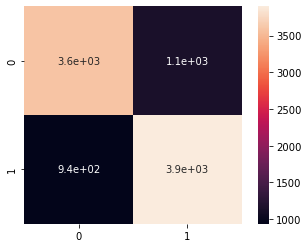

In [41]:
lr = LogisticRegression(penalty='l2',C=1)
classification_model(lr) 

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'gini', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 84.57
f1 Score: 84.57
CV Score: 0.8469831186002891
ROC_AUC Score: 84.56
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4730
           1       0.84      0.85      0.85      4834

    accuracy                           0.85      9564
   macro avg       0.85      0.85      0.85      9564
weighted avg       0.85      0.85      0.85      9564



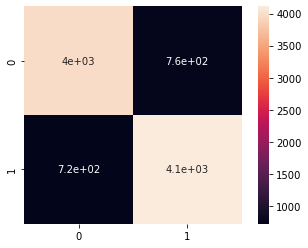

In [42]:
dtc = DecisionTreeClassifier(criterion='gini',splitter='best')
classification_model(dtc)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 200}

Model: RandomForestClassifier
Accuracy Score: 88.54
f1 Score: 88.54
CV Score: 0.8821932426568815
ROC_AUC Score: 88.54
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4730
           1       0.89      0.89      0.89      4834

    accuracy                           0.89      9564
   macro avg       0.89      0.89      0.89      9564
weighted avg       0.89      0.89      0.89      9564



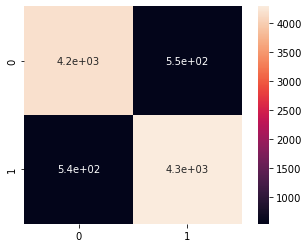

In [43]:
rfc = RandomForestClassifier(n_estimators=200,criterion='gini')
classification_model(rfc)  

In [36]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=3,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 250}

Model: AdaBoostClassifier
Accuracy Score: 87.22
f1 Score: 87.22
CV Score: 0.8614896835890654
ROC_AUC Score: 87.22
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4730
           1       0.87      0.88      0.87      4834

    accuracy                           0.87      9564
   macro avg       0.87      0.87      0.87      9564
weighted avg       0.87      0.87      0.87      9564



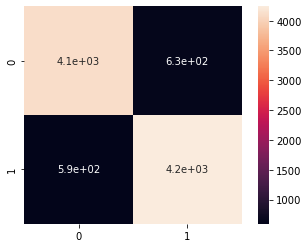

In [44]:
ada = AdaBoostClassifier(n_estimators=250,algorithm='SAMME.R')
classification_model(ada) 

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','deviance','exponential'],
            'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=3,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'n_estimators': 250}

Model: GradientBoostingClassifier
Accuracy Score: 89.18
f1 Score: 89.18
CV Score: 0.880285053418475
ROC_AUC Score: 89.18
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4730
           1       0.89      0.89      0.89      4834

    accuracy                           0.89      9564
   macro avg       0.89      0.89      0.89      9564
weighted avg       0.89      0.89      0.89      9564



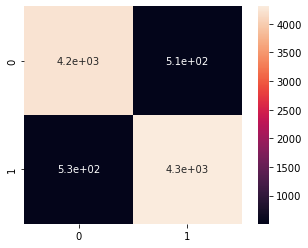

In [45]:
gbc = GradientBoostingClassifier(n_estimators=250,criterion='friedman_mse',loss='log_loss')
classification_model(gbc) 

In [39]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 150}

Model: BaggingClassifier
Accuracy Score: 88.53
f1 Score: 88.53
CV Score: 0.8819058386205153
ROC_AUC Score: 88.53
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4730
           1       0.89      0.88      0.89      4834

    accuracy                           0.89      9564
   macro avg       0.89      0.89      0.89      9564
weighted avg       0.89      0.89      0.89      9564



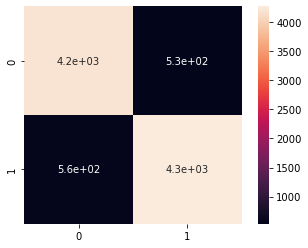

In [46]:
bc = BaggingClassifier(n_estimators=150)
classification_model(bc) 

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':[1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 85.43
f1 Score: 85.43
CV Score: 0.8504836942966767
ROC_AUC Score: 85.38
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4730
           1       0.83      0.90      0.86      4834

    accuracy                           0.85      9564
   macro avg       0.86      0.85      0.85      9564
weighted avg       0.86      0.85      0.85      9564



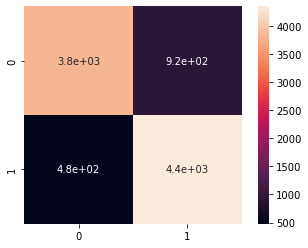

In [47]:
svc = SVC(kernel='rbf',C=10)
classification_model(svc)

In [48]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='F1 Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
4,GradientBoostingClassifier,89.18,89.18,0.880285,89.18
2,RandomForestClassifier,88.54,88.54,0.882193,88.54
5,BaggingClassifier,88.53,88.53,0.881906,88.53
3,AdaBoostClassifier,87.22,87.22,0.861490,87.22
6,SVC,85.43,85.43,0.850484,85.38
1,DecisionTreeClassifier,84.57,84.57,0.846983,84.56
0,LogisticRegression,78.27,78.27,0.782206,78.25


► __GradientBoostingClassifier()__ _appears to be the best model for this dataset with an accuracy score of_ __89.18__.

***
<div class='alert alert-box alert-info'>
    <b>XI. Saving File<b>
        <a id='save'></a>

In [49]:
import joblib
from joblib import dump

joblib.dump(gbc,'GBC_Census_Income.pkl')

['GBC_Census_Income.pkl']